<a href="https://colab.research.google.com/github/Avinash-koduri/TXON_01/blob/main/practice_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
path=('/content/drive/MyDrive/image classificaton')

In [84]:
train =('/content/drive/MyDrive/image classificaton/dataset/training')
test=('/content/drive/MyDrive/image classificaton/dataset/testing')

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train.class_indices

In [86]:
train_gen=ImageDataGenerator(rescale=1/255)
train = train_gen.flow_from_directory(train,target_size=(64,64),batch_size=3,class_mode='binary')

Found 40 images belonging to 2 classes.


In [87]:
test_gen = ImageDataGenerator(rescale=1/255)
test = test_gen.flow_from_directory(test,target_size=(64,64),batch_size=3,class_mode='binary')

Found 40 images belonging to 2 classes.


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

In [117]:
model = Sequential()
model.add(Dense(128,input_shape=(64,64,3)))
model.add(Dense(120,activation='relu'))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [118]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [119]:
model.fit(x=train,validation_data=test,epochs=10)

Epoch 1/10
14/14 [==============================] - 2s 99ms/step - loss: 1.2732 - accuracy: 0.5000 - val_loss: 0.6543 - val_accuracy: 0.6250
Epoch 2/10
14/14 [==============================] - 1s 77ms/step - loss: 0.5978 - accuracy: 0.6250 - val_loss: 0.6100 - val_accuracy: 0.6500
Epoch 3/10
14/14 [==============================] - 1s 101ms/step - loss: 0.4989 - accuracy: 0.8250 - val_loss: 0.5633 - val_accuracy: 0.6750
Epoch 4/10
14/14 [==============================] - 1s 83ms/step - loss: 0.2932 - accuracy: 0.9000 - val_loss: 1.0415 - val_accuracy: 0.5500
Epoch 5/10
14/14 [==============================] - 2s 124ms/step - loss: 0.2906 - accuracy: 0.8500 - val_loss: 0.6457 - val_accuracy: 0.6000
Epoch 6/10
14/14 [==============================] - 2s 138ms/step - loss: 0.1440 - accuracy: 0.9750 - val_loss: 0.6635 - val_accuracy: 0.6500
Epoch 7/10
14/14 [==============================] - 2s 140ms/step - loss: 0.0655 - accuracy: 1.0000 - val_loss: 0.9487 - val_accuracy: 0.6750
Epoch 8/1

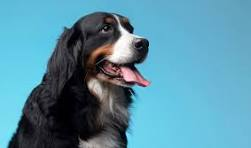

In [120]:
import cv2 as cv
from google.colab.patches import cv_imshow
img=cv.imread('/content/dog2.jpeg')
cv_imshow(img)


In [127]:
img.shape

(148, 251, 3)

In [133]:
test_img=cv.resize(img,(64,64))
test_input=test_img.reshape(1,64,64,3)

In [135]:
value=model.predict(test_input)
if(value==1):
  print("dog")
else:
  print('cat')

1/1 [==============================] - 0s 161ms/step
dog
